# Lista de ajuste e análise de dados

### Ajuste de dados usando o scipy.optimize

In [3]:
from scipy.interpolate import interp1d
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

**Alternative b)** define function

In [4]:
def func(x, a, b):
    return a*exp(-b*x)

**Alternative a)** import data

In [5]:
decay = loadtxt('decay.data', float)
xd = decay[:,0]
yd = decay[:,1]

**Alternative c)** make adjustment

In [6]:
param, pcov = curve_fit(func, xd, yd)

C:\Users\erick\AppData\Local\Temp\ipykernel_22864\3314985691.py:2: RuntimeWarning: overflow encountered in exp
  return a*exp(-b*x)


**Alternative d)** make plot and calculate R2

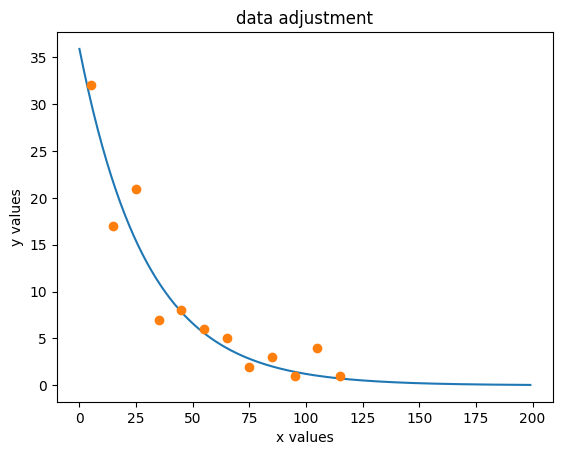

In [7]:
time = linspace(0, 200, 200)
plt.plot(func(time, param[0], param[1]))
plt.plot(xd, yd, 'o')
plt.title('data adjustment')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

Como vemos, o modelo exponencial em azul parece se adequar aos dados experimentais em laranja

Utilizando as equações:

$$ SS_{r} = \sum_{i=1}^{N} (y_{i} - \hat{y})^{2} \hspace{1cm} e \hspace{1cm} SS_{t} = \sum_{i=1}^{N} (y_{i} - \overline{y})^{2}$$

e

$$ R^{2} = 1 - \frac{SSr}{SSt}. $$

Fonte: https://medium.com/@felipeparpinelli/dissecando-modelos-de-regress%C3%A3o-linear-parte-2-e035b53dd351

In [10]:
SSt = 0
SSr = 0
media = sum(yd)/len(yd)

for i in range(len(xd)):
    SSr += (yd[i] - func(xd[i], param[0], param[1]))**2
    SSt += (yd[i] - media)**2

In [11]:
R2 = 1- SSr/SSt
print(f'R2 = {R2}')

R2 = 0.9171636070691509


### Regressão linear e o método dos mínimos quadrados

**Alternative a)** calculate log

In [13]:
xdlog = np.log(xd)
ydlog = np.log(yd)

**Alternative b)** make plot log(yd) $\times$ time

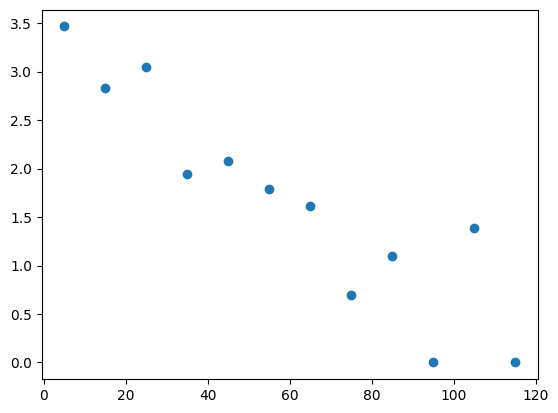

In [14]:
plt.plot(xd, ydlog, 'o')

In [15]:
sum1, sum2 = 0, 0
mediaY = sum(ydlog)/len(ydlog)
mediaX = sum(xd)/len(xd)

for i in range(len(xd)):
    sum1 += xd[i]*(ydlog[i]-mediaY)
    sum2 += xd[i]*(xd[i]-mediaX)
    
m = sum1/sum2
a = mediaY - m*mediaX

**Alternative c)** find **a** and **m** that minimize result

In [132]:
print(f'"a" value: {a} and "m" value: {m}')

"a" value: 3.362368572371219 and "m" value: -0.02833381705712501


**Alternative d)** make plot

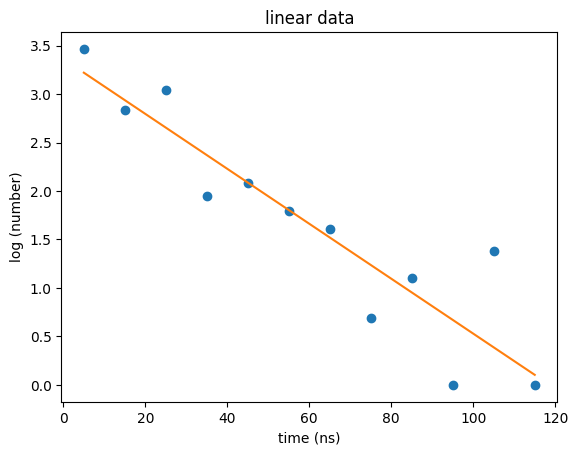

In [136]:
plt.plot(xd, ydlog, 'o')
plt.plot(xd, a + m*xd)
plt.title('linear data')
plt.xlabel('time (ns)')
plt.ylabel('log (number)')
plt.show()

### ajuste de dados e erro experimental

**Alternative a)** import data

In [159]:
scat = loadtxt('scattering.data')
t, xd3, yd3 = scat[:,0], scat[:,1], scat[:,2]

In [161]:
Er, Gamma = 78, 55
def func(E, fr, Er, Gamma):
    return fr/((E - Er)**2 + (Gamma**2)/4)

In [163]:
param, pcov = curve_fit(func, t, xd3)

**Alternative b)** make plot and compare with true values

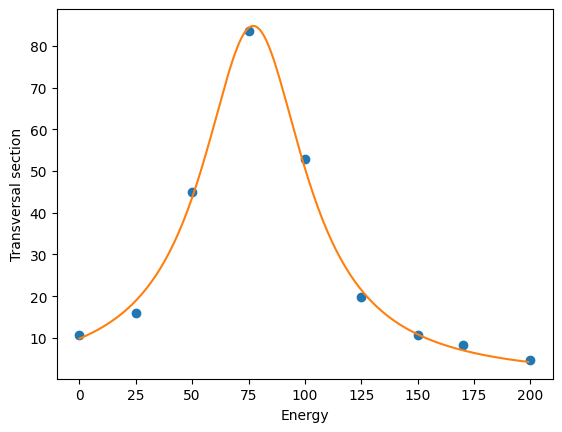

In [166]:
plt.plot(t, xd3, "o")
plt.plot(func(time, param[0], param[1], param[2]))
plt.xlabel('Energy')
plt.ylabel('Transversal section')
plt.show()

In [167]:
trueEr, trueGam = 78, 55

erroEr = abs(abs(param[1])-trueEr)/trueEr
erroGam = abs(abs(param[2])-trueGam)/trueGam
print(f'erro em Ef: {100*erroEr}% e erro em Gamma: {100*erroGam}%')

erro em Ef: 0.6559027403227993% e erro em Gamma: 1.9993216426068339%


**Alternative c)** make graphic of errorbars

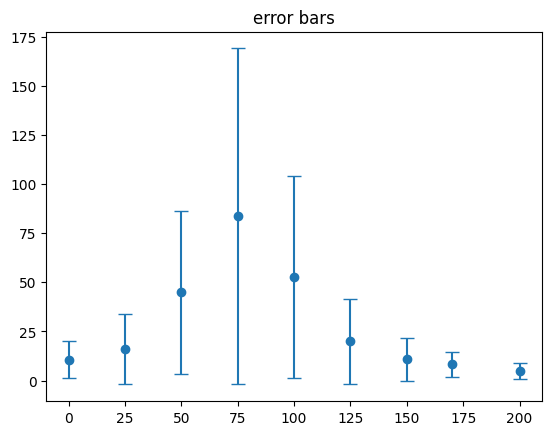

In [171]:
from pylab import errorbar
errorbar(t, xd3, yd3, fmt='o', capsize=5)
plt.title('error bars')
plt.show()

**Alternative d)** possible explanation for high errorbars

Os valores de barra de error parecem ser bem maiores do que esperávamos para resultados próximos ao centro da amostragem. Isso indica que o método, apesar de muito bom e visualmente coerente, não tem tanta precisão assim longe das extremidades da amostra. Isso parece indicar que existe alguma característica (provavelmente matemática) de f(E) que produza erros maiores quando E está próximo de Er=78 (é o que parece pelo gráfico).

**Alternative e)** make graphic with weights

In [174]:
param, pcov = curve_fit(func, t, xd3, sigma = yd3)

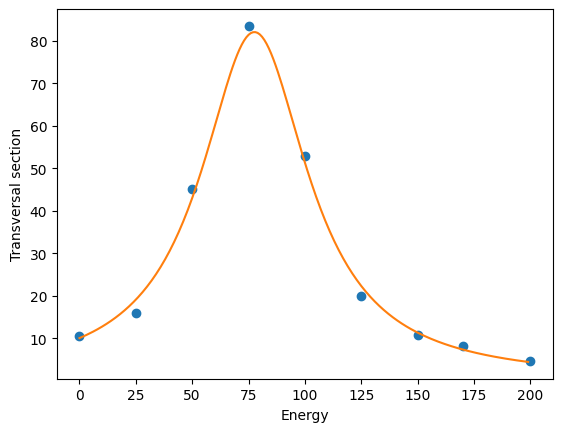

In [176]:
time3 = linspace()
plt.plot(t, xd3, "o")
plt.plot(func(time, param[0], param[1], param[2]))
plt.xlabel('Energy')
plt.ylabel('Transversal section')
plt.show()